# Homework : 8 Machine Learning - 1 (Supervised Methods)

## Comparison of PCA and MDA on wine dataset.

### Importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from utils.helper import Engine


### Instantiate an object for the Engine Class

In [2]:
engine = Engine()

### Loading the UCI Wine Dataset using Pandas.

In [3]:
import pandas as pd

# Define the column names
columnNames = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Load the Wine dataset from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wineData = pd.read_csv(url, header=None, names=columnNames)

wineData

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Exploratory Data-Analysis on the UCI Wine Dataset.

In [4]:
engine.performDataAnalysis(wineData)

$$ DATA ANALYSIS OF THE UCI WINE DATAS $$
-------------------------------------------------------------------
Shape of X_train: (178, 13)
Number of Features in the Training Data: 13
Number of Data-Points in the Training Data: 178
Number of classes in Y_train is: 3
{'Barolo wine - 1': 1, 'Grignolino wine - 2': 2, 'Barbera wine - 3': 3}
-------------------------------------------------------------------


### Generating the Train Data from the Pandas Dataframe and Standardizing the X_train.

In [5]:
n_train, X_train, Y_train = engine.generateTrainData(wineData)
X_train_std = engine.standardizeData(X_train)

Generated the Train Data!
Standardized the Train Data!


## We will pick 2 pairs of features to look at the data as follows: plot the data projected into x1, x2 space, and also plot the data instead projected into x1, x6 space. For both plots, use 3 different symbols to denote data points belonging to class 1, 2, and 3.

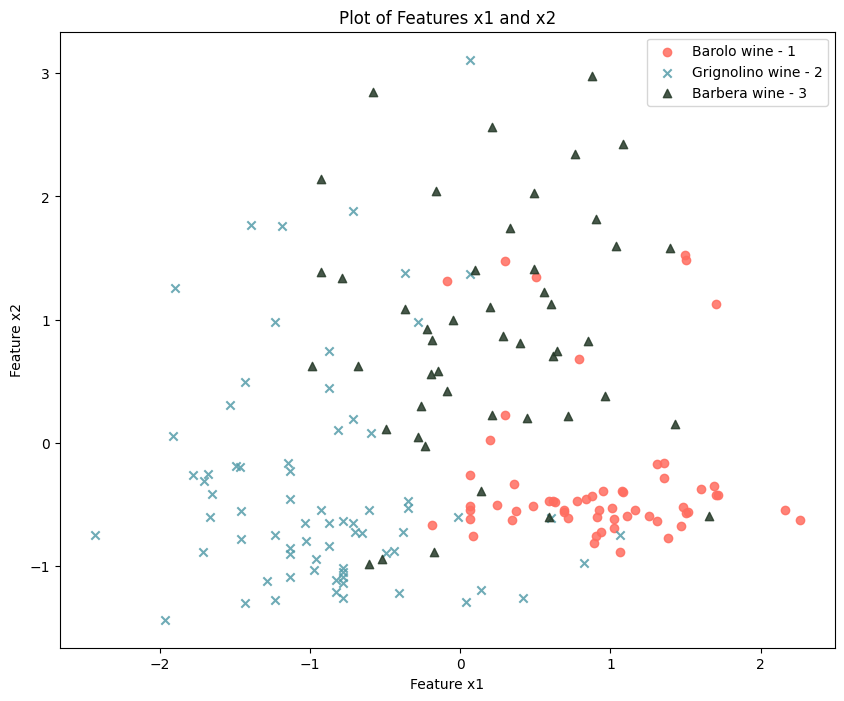

In [6]:
engine.plotScatterData(X_train_std[:, 0], X_train_std[:, 1], Y_train, position="upper right")

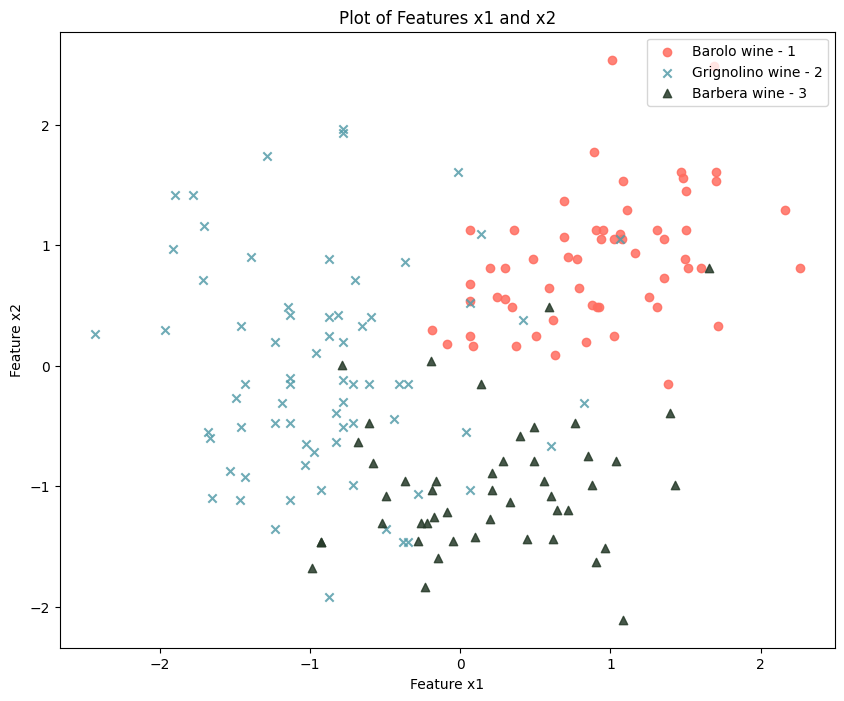

In [7]:
engine.plotScatterData(X_train_std[:, 0], X_train_std[:, 5], Y_train, position="upper right")

## x1 and x2 as Features

## Do a total of 5 runs. Report the mean classification error rate from each cross-val run, and also report the average and standard deviation of the mean classification error over the 5 runs.

In [8]:
run_min, run_max, model_min_CER, model_max_CER = engine.train_MCP(n_train, X_train_std[:, 0], X_train_std[:, 1], Y_train, runs=5)

-----------------------------------------------------------------------------------------------------------------------------------
The Mean Classification Error Rate from each cross-val run are: {1: 0.2729166666666667, 2: 0.29861111111111105, 3: 0.2569444444444445, 4: 0.2965277777777778, 5: 0.2576388888888889}
The Average of the Mean Classification Error Rate over the 5 runs is: 0.2765277777777778
The Standard Deviation of the Mean Classification Error Rate over the 5 runs is: 0.018116350639514188
The Lowest Mean Classification Error Rate -> 0.2569444444444445 was achieved at run: 3
The Higesh Mean Classification Error Rate -> 0.29861111111111105 was achieved at run: 2
-----------------------------------------------------------------------------------------------------------------------------------


## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Minimum Classification Error Rate

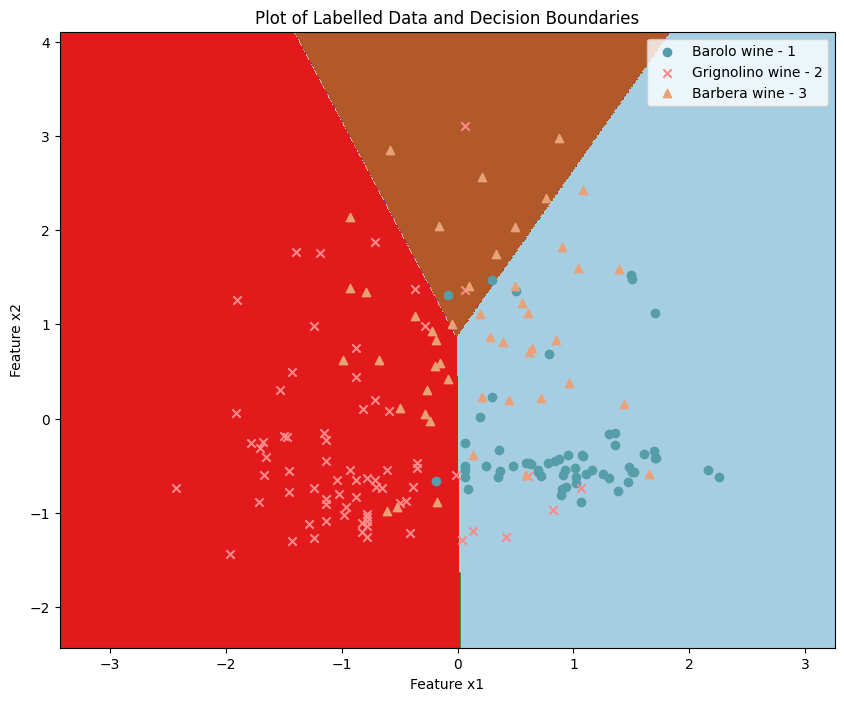

In [9]:
engine.plotDecisionBoundary_MCP(X_train_std[:, 0], X_train_std[:, 1], Y_train, model_min_CER, "Plot of Labelled Data and Decision Boundaries", position="upper right")

## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Maximum Classification Error Rate

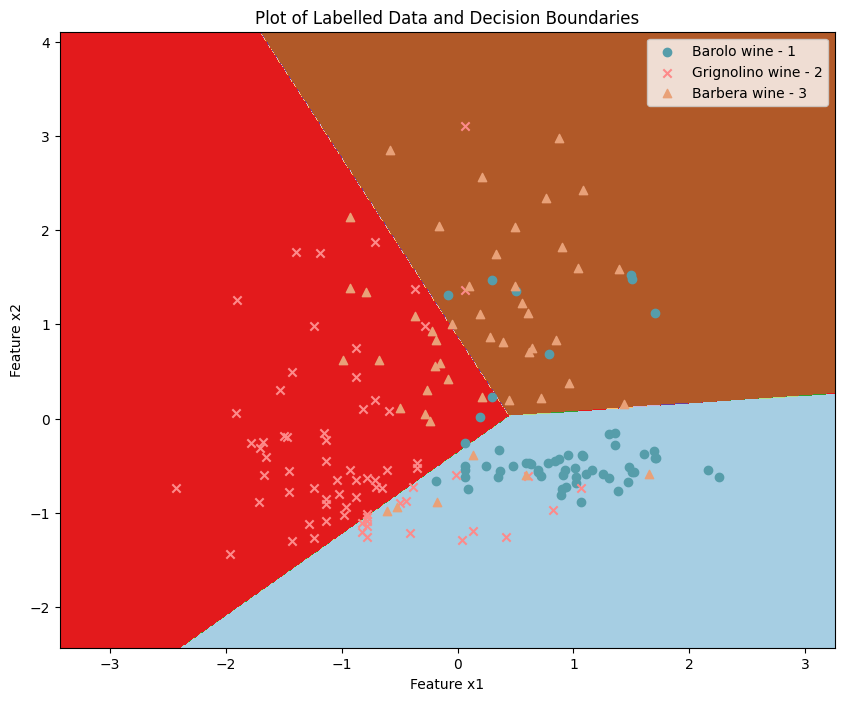

In [10]:
engine.plotDecisionBoundary_MCP(X_train_std[:, 0], X_train_std[:, 1], Y_train, model_max_CER, "Plot of Labelled Data and Decision Boundaries", position="upper right")

## x1 and x6 as Features

## Do a total of 5 runs. Report the mean classification error rate from each cross-val run, and also report the average and standard deviation of the mean classification error over the 5 runs.

In [11]:
run_min, run_max, model_min_CER, model_max_CER = engine.train_MCP(n_train, X_train_std[:, 0], X_train_std[:, 5], Y_train, runs=5)

-----------------------------------------------------------------------------------------------------------------------------------
The Mean Classification Error Rate from each cross-val run are: {1: 0.24513888888888888, 2: 0.19236111111111115, 3: 0.19444444444444445, 4: 0.1479166666666667, 5: 0.23055555555555554}
The Average of the Mean Classification Error Rate over the 5 runs is: 0.20208333333333334
The Standard Deviation of the Mean Classification Error Rate over the 5 runs is: 0.033915631524835184
The Lowest Mean Classification Error Rate -> 0.1479166666666667 was achieved at run: 4
The Higesh Mean Classification Error Rate -> 0.24513888888888888 was achieved at run: 1
-----------------------------------------------------------------------------------------------------------------------------------


## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Minimum Classification Error Rate

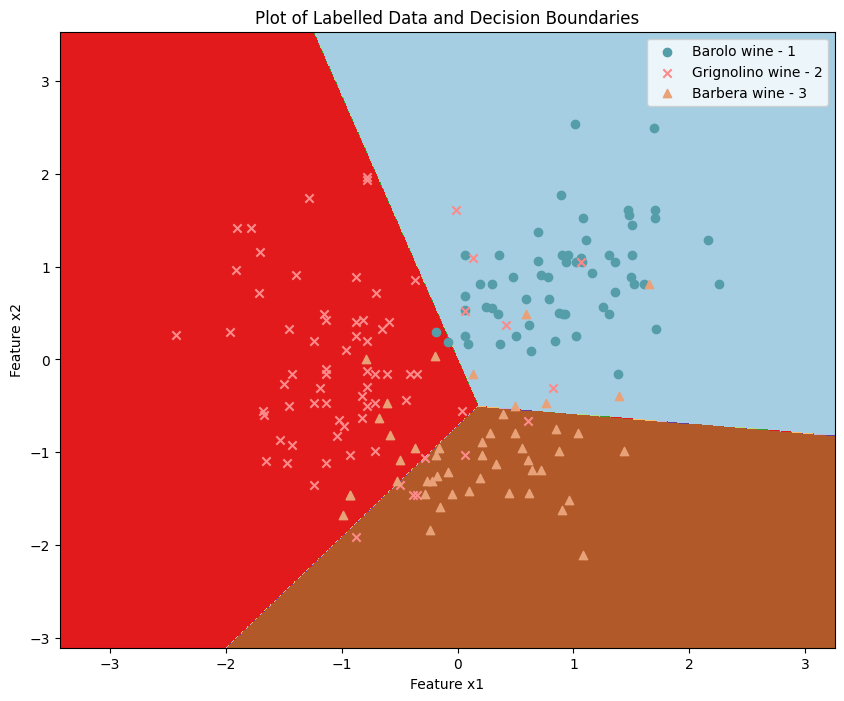

In [12]:
engine.plotDecisionBoundary_MCP(X_train_std[:, 0], X_train_std[:, 5],Y_train, model_min_CER, "Plot of Labelled Data and Decision Boundaries", position="upper right")

## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Maximum Classification Error Rate

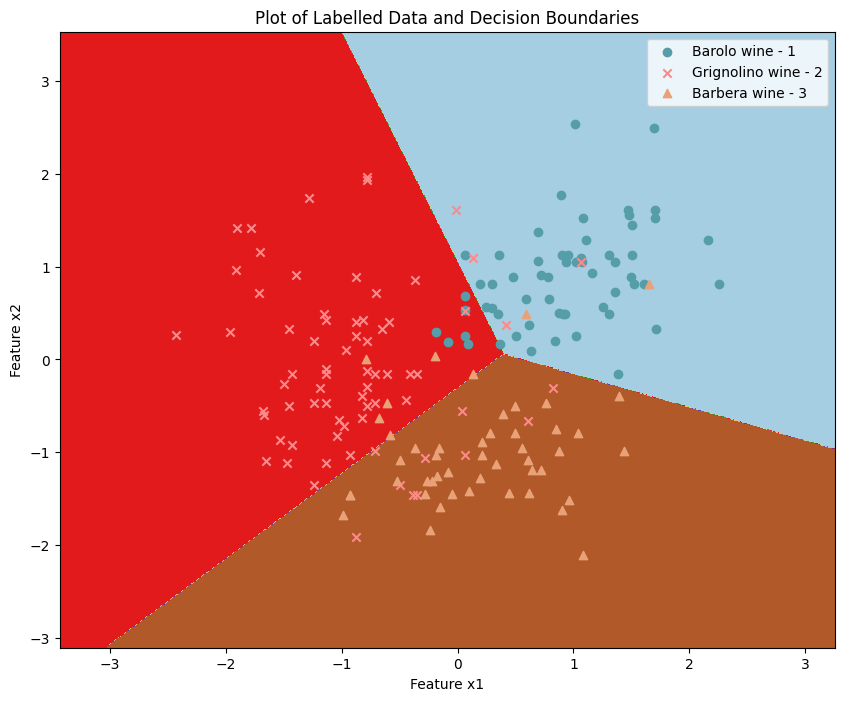

In [13]:
engine.plotDecisionBoundary_MCP(X_train_std[:, 0], X_train_std[:, 5],Y_train, model_max_CER, "Plot of Labelled Data and Decision Boundaries", position="upper right")